In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold

# Load Dataset

In [ ]:
(trainX,trainY),(testX,testY) = fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# Create Pixel Data of Images

In [ ]:
trainX = trainX.astype("float32")
testX = testX.astype("float32")
trainX = trainX/255.0
testX = testX/255.0

# Defining First Model

In [ ]:
def define_model_base():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", kernel_initializer="he_uniform", input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

# Train and Evaluate the model

In [ ]:
def train_evaluate_model(dataX, dataY, define_model, n_folds = 5):
    scores, histories = list(),list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for i, (train_ix, test_ix) in enumerate(kfold.split(dataX)):
        print("#Iteration ", i+1, end="\n\n")
        model = define_model()
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,testY))
        _, acc = model.evaluate(testX,testY)
        print("\n> %.3f" % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

# Performance Visualization and Summarization

In [ ]:
def performance_visualization(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title("Cross Entropy Loss")
        plt.plot(histories[i].history['loss'],color='blue',label='train')
        plt.plot(histories[i].history['val_loss'], color='orange',label='test')
        plt.subplot(2, 1, 2)
        plt.title('Accuracy')
        plt.plot(histories[i].history['accuracy'],color='blue',label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange',label='test')
    plt.show()

In [ ]:
def performance_summarization(scores):
    print("Accuracies: mean = %.2f, std = %.2f n = %d" %(np.mean(scores)*100, np.std(scores), len(scores)))
    plt.boxplot(scores)
    plt.show()

# Train First Model and Analyse it

In [ ]:
scores_base, histories_base = train_evaluate_model(trainX,trainY, define_model_base)

#Iteration  1

Epoch 1/10
1500/1500 [==============================] - 11s 5ms/step - loss: 0.4403 - accuracy: 0.8432 - val_loss: 0.3231 - val_accuracy: 0.8836
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2914 - accuracy: 0.8933 - val_loss: 0.2746 - val_accuracy: 0.8979
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2469 - accuracy: 0.9110 - val_loss: 0.2799 - val_accuracy: 0.8980
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2194 - accuracy: 0.9193 - val_loss: 0.2482 - val_accuracy: 0.9108
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1944 - accuracy: 0.9287 - val_loss: 0.2747 - val_accuracy: 0.9023
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1742 - accuracy: 0.9359 - val_loss: 0.2529 - val_accuracy: 0.9077
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1579 - accuracy: 0.9420 - val_loss: 0.2549

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


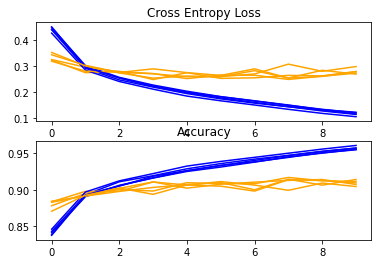

In [ ]:
performance_visualization(histories_base)

Accuracies: mean = 90.94, std = 0.00 n = 5


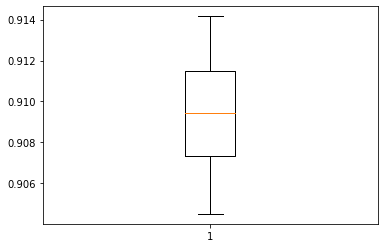

In [ ]:
performance_summarization(scores_base)

# Improvised Model 1

In [ ]:
def define_model_improved_1():
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same', activation='relu',kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
scores_improved_1, histories_improved_1 = train_evaluate_model(trainX,trainY, define_model_improved_1)

#Iteration  1

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4474 - accuracy: 0.8401 - val_loss: 0.3316 - val_accuracy: 0.8794
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2994 - accuracy: 0.8919 - val_loss: 0.3143 - val_accuracy: 0.8849
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2573 - accuracy: 0.9058 - val_loss: 0.2756 - val_accuracy: 0.8973
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2268 - accuracy: 0.9166 - val_loss: 0.2618 - val_accuracy: 0.9057
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2006 - accuracy: 0.9271 - val_loss: 0.2527 - val_accuracy: 0.9082
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1823 - accuracy: 0.9328 - val_loss: 0.2525 - val_accuracy: 0.9095
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1614 - accuracy: 0.9410 - val_loss: 0.2698 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


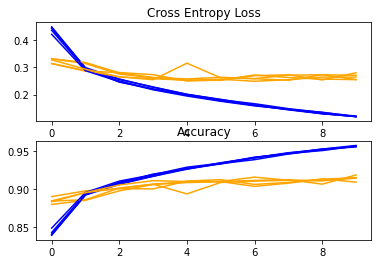

In [ ]:
performance_visualization(histories_improved_1)

Accuracies: mean = 91.41, std = 0.00 n = 5


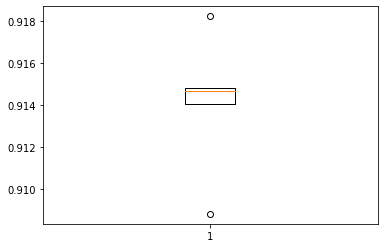

In [ ]:
performance_summarization(scores_improved_1)

# Improvised Model 2

In [ ]:
def define_model_improved_2():
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
scores_improved_2, histories_improved_2 = train_evaluate_model(trainX,trainY, define_model_improved_2)

#Iteration  1

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4405 - accuracy: 0.8409 - val_loss: 0.2978 - val_accuracy: 0.8908
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2810 - accuracy: 0.8969 - val_loss: 0.2693 - val_accuracy: 0.9018
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2334 - accuracy: 0.9150 - val_loss: 0.2510 - val_accuracy: 0.9043
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2059 - accuracy: 0.9246 - val_loss: 0.2454 - val_accuracy: 0.9107
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1790 - accuracy: 0.9334 - val_loss: 0.2556 - val_accuracy: 0.9093
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1603 - accuracy: 0.9408 - val_loss: 0.2271 - val_accuracy: 0.9170
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1404 - accuracy: 0.9476 - val_loss: 0.2446 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


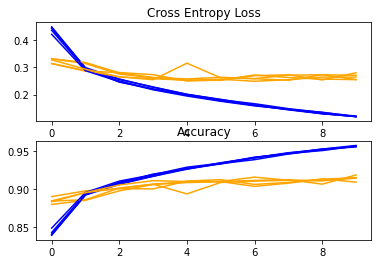

In [ ]:
performance_visualization(histories_improved_1)

Accuracies: mean = 91.41, std = 0.00 n = 5


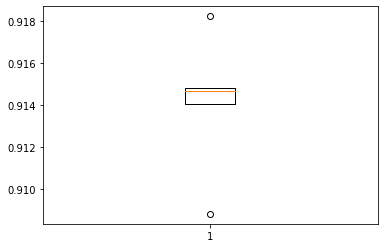

In [ ]:
performance_summarization(scores_improved_1)

# Using the best model from the above three models

In [ ]:
model = define_model_improved_2()

In [ ]:
model.fit(trainX,trainY,epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3925 - accuracy: 0.8581
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2570 - accuracy: 0.9053
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2143 - accuracy: 0.9217
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1845 - accuracy: 0.9318
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1654 - accuracy: 0.9384
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1422 - accuracy: 0.9477
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1240 - accuracy: 0.9549
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1095 - accuracy: 0.9585
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0929 - accuracy: 0.9650
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.081

In [ ]:
_,acc = model.evaluate(testX, testY)

313/313 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9080


In [ ]:
print("> %.3f" % (acc*100.0))

> 90.800
